
# The Spam Detector

## Description

Madame Esposito développe pour son entreprise un chatbot dans le but de répondre automatiquement à ses nombreux clients. Cependant son programme reçoit un grand nombre de message malveillant ou à caractère publicitaire ce qui dégrade les performance de son bot en plus d'occasionner des traitements informatique se répercutant sur sa facture d'électricité.

Madame Esposito vous a contacté afin de créer un programme capable de détecter automatiquement les SPAM. 
Pour cela, elle a construit un jeux de donnée comportant un ensemble de SMS de type SPAM et NON SPAM (HAM), disponible à l'adresse suivante : 
http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/

Par ailleurs, afin d'intégrer les résultats dans son équipe, elle nous demande les choses suivantes:
* Afin d'estimer le cout du développement et suivre le projet, une checklist des taches à réaliser doit être rédigé.
* Vous devez créer des fonctions pour les différentes partie de votre code afin de pouvoir les réutiliser facilement
* Vous devez effectuer une validation croisé (cross-validation) sur 10 jeux d'apprentissage et de test différent. Le seed doit être fixé à 42 et le jeux de test doit représenter 20% des données.
* Comparer au moins trois algorithme de classification en terme de **f1 score**. Lequel est le plus puissant ?

## Bonus


Pouvez améliorer les résultats ?
* est-ce que la lemmatisation améliore les résultats ?
* est-ce que la racinisation (stemming) améliore les résultats ?

* est-ce que la lemmatisation améliore les résultats ?
* est-ce que la racinisation (stemming)  améliore les résultats ?

Une fois ces étapesréalisées, reproduire la même expérience avec le jeux suivant, représentant cette fois des commentaires Youtube :
https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection

Les performances sont-elles similaire à ceux obtenus avec le jeux de données précèdent ?

Madame esposito souhaite contrôler si les modèles appris avec le premier jeux de données sont capable de prédire les données de test du deuxième jeu et vice-versa.
Réaliser un tableau comparant
* les résultats de prédiction du modelés appris sur les SPAN SMS pour prédire les SPAM commentaire Youtube.
* et les résultats de prédiction du modèles appris sur les SPAM commentaire Youtube pour prédire les SPAM SMS.



## Proposed Plan

**1) Veille en Traitement du langage + checklist+45min**

https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32

https://towardsdatascience.com/your-guide-to-natural-language-processing-nlp-48ea2511f6e1

https://code.tutsplus.com/fr/tutorials/introducing-the-natural-language-toolkit-nltk--cms-28620

https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63

* parsing and tokenization ?
* vectorization ? Bag of words ?
* advantage of TFIDF ?
* stops words ?

**2) Load, clean and prepare the data**

Vectoriser et netoyer vos données.
https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

Quelle est le type Python de vos données après vectorisation.

* Quelle sont les 10 mots les plus fréquent dans le jeux de données ?
* Les moins fréquents ?
* Tracer la distribution de la fréquence des mots présents dans le jeux de données. Qu'observez vous ?




**Aides/propositions**
* Stop words avec NLTK
* scikit-learn pour la vectorization

**3) Apprenstissage**

Que représente la mesure f1 ?
Quelles sont ces avantages sur d'autre mesure tel que la précision le rappel ou l'accuracy ?

**3) Veille cross validation**
https://scikit-learn.org/stable/modules/cross_validation.html

Utilisez la méthode de [ShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit) pour construire vos jeux de données permettant la validation croisée.

**4) Train**

Fit the models and compare the performance in a table that show
* the mean of the f1 score
* the standard deviation of the f1 score

Qu'observez vous ?



## 0. Import des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
# import plotly.express as px # on est pas dans le bon environnement

## nltk
import nltk
# nltk.download() ## à executer qu'une fois
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = nltk.corpus.stopwords.words('english')

## sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

### models ML
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn import svm      # Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier 



### evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


## 1. Veille NLT
https://docs.google.com/document/d/1p1eJt4l0cJZjILpwl9RcKvmSCZAUo17h7RSzA_1-Aa4/edit?ts=5fc6087c#

## 2. Load, clean and prepare the data
### 2.1 Vectorize and clean the datas

In [2]:
data_brute = open("./datas/SMSSpamCollection.txt", "r")
test1 = data_brute.readlines()

data_brute.close()
test1[0:5]

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n',
 'ham\tOk lar... Joking wif u oni...\n',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n",
 'ham\tU dun say so early hor... U c already then say...\n',
 "ham\tNah I don't think he goes to usf, he lives around here though\n"]

In [3]:
#test2 = pd.read_csv('./datas/SMSSpamCollection.txt', sep ='\t', delimiter="\n", header=None)
df_brute = pd.read_csv('./datas/SMSSpamCollection.txt', sep='\t', names=["Labels", "Messages"])
print(df_brute.info())
df_brute.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Labels    5572 non-null   object
 1   Messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


,Labels,Messages
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
labels = df_brute['Labels'].values
targets = np.array([1 if x == 'ham' else 0 for x in labels])
corpus = df_brute['Messages'].values
print('Le premier message est : ', corpus[0])
print('c\'est un : ', labels[0], 'donc a pour target', targets[0])

Le premier message est :  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
c'est un :  ham donc a pour target 1


In [5]:
targets

array([1, 1, 0, ..., 1, 1, 1])

In [6]:
labels

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

#### Scikit Learn

In [7]:
def prepare(vect, corpus):
    X = vect.fit_transform(corpus)
    ind = np.arange(1,X.shape[0]+1)
    df_vector = pd.DataFrame(X.toarray(), columns = vect.get_feature_names(), index = ind)
    return df_vector

vect = CountVectorizer()
df_vector = prepare(vect, corpus)
df_vector



,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Y a beaucoup de 0 !!!**

In [8]:
def affich_sum_min_var(df, nb_values, ascending_bool):
    s = df.sum()
    f = df.sum()/sum(df.sum())
    m = df.mean()
    v = df.var()

    groupped = pd.concat([s, f, m, v], axis = 1)
    groupped.columns = ["sum_val", "freq_val", "mean_val", "var_val"]
    Y = groupped.sort_values('sum_val', ascending=ascending_bool)[:nb_values]
    return Y

ascending_bool = False
affich_sum_min_var(df_vector, 10, ascending_bool)

,sum_val,freq_val,mean_val,var_val
to,2253,0.028004,0.404343,0.522710
you,2245,0.027904,0.402907,0.635518
the,1339,0.016643,0.240309,0.341990
and,980,0.012181,0.175879,0.222875
in,903,0.011224,0.162060,0.171003
is,897,0.011149,0.160983,0.201148
me,807,0.010031,0.144831,0.175933
my,766,0.009521,0.137473,0.234912
it,752,0.009347,0.134961,0.225904
for,711,0.008837,0.127602,0.152984


Evidament les 10 mots les plus fréquents sont des stop words. Je vais effectuer la même opération en supprimant ces mots.

In [9]:
## instence de CountVecorizer prenant en compte stopwords
vect = CountVectorizer(stop_words = stopwords) # stopwords NLTK
#vect = CountVectorizer(stop_words = 'english') # stopwords sklearn

df_vector = prepare(vect, corpus)
df_vector


,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_vector.columns.values

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

### 2.1 Questions / Responses 

**Quelle est le type Python de vos données après vectorisation :** <br>

Ici nous somme dans le cadre d'un problème de classification supervisée (SMS labélisé ham ou spam). Nous souhaitons réaliser une classification des SMS mais il n'y a aucune valeur numérique donc impossible d'appliquer un classifieur de sklearn par exemple. La vectorisation (transformation en sac de mot) permet

In [11]:
ascending_bool = False
res = affich_sum_min_var(df_vector, 10,ascending_bool)
res

,sum_val,freq_val,mean_val,var_val
call,593,0.011937,0.106425,0.111271
get,391,0.007871,0.070172,0.073517
ur,391,0.007871,0.070172,0.114802
gt,318,0.006401,0.057071,0.142138
lt,316,0.006361,0.056712,0.141102
ok,293,0.005898,0.052584,0.055572
free,284,0.005717,0.050969,0.072433
go,283,0.005697,0.050790,0.055758
know,262,0.005274,0.047021,0.050203
good,247,0.004972,0.044329,0.047756


In [12]:
res.index.values

array(['call', 'get', 'ur', 'gt', 'lt', 'ok', 'free', 'go', 'know',
       'good'], dtype=object)

**Q1.** Quelle sont les 10 mots les plus fréquent dans le jeux de données ? <br>
**R1.** Les 10 mots les plus fréquens sont : 'call', 'get', 'ur', 'gt', 'lt', 'ok', 'free', 'go', 'know' et 'good'


In [13]:
ascending_bool = True
res = affich_sum_min_var(df_vector, 10, ascending_bool)
res

,sum_val,freq_val,mean_val,var_val
jot,1,0.00002,0.000179,0.000179
mallika,1,0.00002,0.000179,0.000179
malarky,1,0.00002,0.000179,0.000179
makiing,1,0.00002,0.000179,0.000179
maintaining,1,0.00002,0.000179,0.000179
mailed,1,0.00002,0.000179,0.000179
mahfuuz,1,0.00002,0.000179,0.000179
mahaveer,1,0.00002,0.000179,0.000179
magicalsongs,1,0.00002,0.000179,0.000179
manageable,1,0.00002,0.000179,0.000179


In [14]:
res.index.values

array(['jot', 'mallika', 'malarky', 'makiing', 'maintaining', 'mailed',
       'mahfuuz', 'mahaveer', 'magicalsongs', 'manageable'], dtype=object)

**Q2.** Les moins fréquents ? <br>
**R2.** Les 10 mots les plus fréquens sont : 'jot', 'mallika', 'malarky', 'makiing', 'maintaining', 'mailed',
       'mahfuuz', 'mahaveer', 'magicalsongs', 'manageable' mais il y en bien d'autres qui sont à une occurence.


In [15]:
ascending_bool = False
res = affich_sum_min_var(df_vector, len(df_vector.columns),ascending_bool)
res

,sum_val,freq_val,mean_val,var_val
call,593,0.011937,0.106425,0.111271
get,391,0.007871,0.070172,0.073517
ur,391,0.007871,0.070172,0.114802
gt,318,0.006401,0.057071,0.142138
lt,316,0.006361,0.056712,0.141102
...,...,...,...,...
havbeen,1,0.000020,0.000179,0.000179
hava,1,0.000020,0.000179,0.000179
hav2hear,1,0.000020,0.000179,0.000179
haunt,1,0.000020,0.000179,0.000179


**Q3.** Tracer la distribution de la fréquence des mots présents dans le jeux de données. Qu'observez vous ?
**R3.** 

<Figure size 1080x576 with 0 Axes>

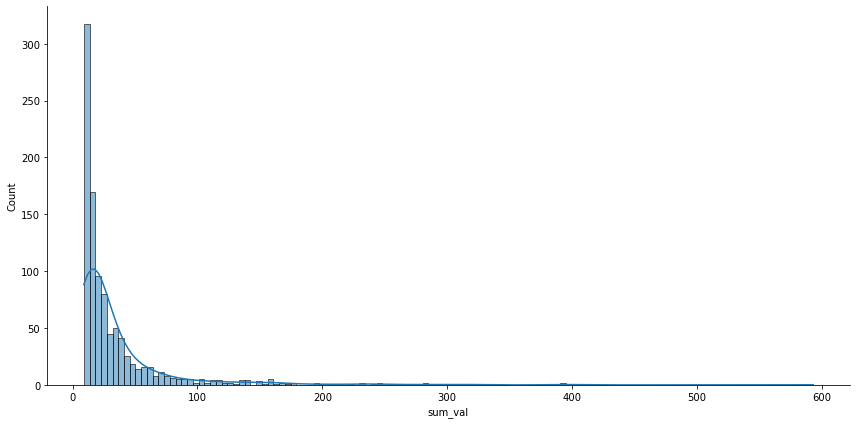

In [16]:
# distribution des fréquences des mots présents dans le jeux de donnée
plt.figure(figsize=(15,8))
sns.displot(res[:1000], x="sum_val", kde = True, fill=True, height=6, aspect = 2)# kind="kde" à la place de kde = True


Densité : c'est une **loi de Pareto**

In [17]:
x = res.sum_val.unique()
x

array([593, 391, 318, 316, 293, 284, 283, 262, 247, 240, 232, 221, 215,
       200, 195, 193, 177, 176, 173, 169, 167, 162, 160, 159, 158, 153,
       150, 149, 148, 142, 140, 138, 136, 135, 134, 132, 126, 122, 120,
       118, 116, 115, 114, 113, 112, 111, 108, 107, 103, 102, 101, 100,
        97,  96,  93,  92,  91,  89,  88,  87,  86,  84,  83,  81,  80,
        79,  78,  77,  76,  75,  74,  73,  72,  71,  70,  69,  68,  67,
        66,  65,  64,  63,  62,  61,  60,  59,  58,  57,  56,  55,  54,
        53,  52,  51,  50,  49,  48,  47,  46,  45,  44,  43,  42,  41,
        40,  39,  38,  37,  36,  35,  34,  33,  32,  31,  30,  29,  28,
        27,  26,  25,  24,  23,  22,  21,  20,  19,  18,  17,  16,  15,
        14,  13,  12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,
         1])

In [18]:
#nb = res[:-1].sum_val.nunique()
#print("Dans le jeu de SMS il y a {} mots qui n'apparaise qu'une seul fois".format(nb))
#nb = res[:-2].sum_val.nunique()
#print("Dans le jeu de SMS il y a {} mots qui n'apparaise que deux fois".format(nb))
#res[res['sum_val']==1].nunique()

**Amelioration TF-IDF** (On enlève les mots qui apparaise très souvent)

In [19]:
vect = TfidfVectorizer(stop_words = stopwords)
df_vector = prepare(vect, corpus)
df_vector

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#ascending_bool = False
#res = affich_sum_min_var(df_vector, len(df_vector.columns),ascending_bool)
#res

## 3. Apprentissage

### 3.1. Fonctions utilisées

In [21]:
## Fonction permettant l'apparntissage de l'algo de ML
def fit_model(model, X, y):
    tps1 = time.time()
    model.fit(X, y)
    tps2 = time.time()
    tps = tps2 - tps1
    return tps

## Evaluation du modèle
def evalu_model(model, X, y):
    ypred = model.predict(X)
    result = {
        "f1_0" : f1_score(y, ypred,pos_label = 0),
        "f1_1" : f1_score(y, ypred)#,
        #"prec" : precision_score(y, ypred),
        #"recall" : recall_score(y, ypred)
    }
    return ypred, result

### **f1-score**

The traditional balanced F-score (F1 score) is the harmonic mean of precision and recall: 
![f1-score](f1score.svg)


### 3.2. Choix des modèles

In [22]:
## Clasifier LogisticRegression
LRG = LogisticRegression(max_iter = 2000, solver='liblinear')

## Classifier SVM
SVM = svm.SVC(kernel='linear') # kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
SVM_OVOC = OneVsOneClassifier(svm.LinearSVC())# OneVsOneClassifier(svm.SVC(kernel='linear'))
lin_SVM = svm.LinearSVC()

## Classifier KNN
Nneighbors=3
KNN = KNeighborsClassifier(n_neighbors=Nneighbors)

## Classifier Stochastic Gradient Descent
SGD = SGDClassifier()

## Decision Tree Classifier
DTC = DecisionTreeClassifier()

### 3.3 SPLIT Training set / Testing set

In [52]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df_vector.values, targets, test_size=0.2, random_state=42)

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)


(4457, 8713)
(4457,)
(1115, 8713)
(1115,)


### 3.3 Entreinement / Prediction / Evaluation

In [59]:
## vectorisation
#vect = CountVectorizer(stop_words = stopwords)

#vect = TfidfVectorizer()
#df_vector = prepare(vect, corpus)

#vect = TfidfVectorizer(stop_words = stopwords)
#df_vector = prepare(vect, corpus)
#
vect = CountVectorizer(stop_words = stopwords) # stopwords NLTK
df_vector = prepare(vect, corpus)

## Fit du modèle de ML : LGR
tps = fit_model(LRG, xtrain, ytrain)
print("temps d'execution {} secondes".format(tps))
ypred, result = evalu_model(LRG, xtest, ytest)
result


temps d'execution 0.304523229598999 secondes


{'f1_0': 0.8449612403100776, 'f1_1': 0.9797160243407709}

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

[[105  44]
 [  1 965]]
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       149
           1       0.96      1.00      0.98       966

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



In [60]:
## ## Fit du modèle de ML : SVM_OVOC SVM dans One Vs One Classifier
## tps =fit_model(SVM_OVOC, xtrain, ytrain)                                # Pas de gain
## print("temps d'execution {} secondes".format(tps))
## ypred, result = evalu_model(SVM_OVOC, xtest, ytest)
## result

## ## Fit du modèle de ML : SVM_OVOC SVM dans One Vs One Classifier
## tps =fit_model(SVM_OVOC, xtrain, ytrain)
## print("temps d'execution {} secondes".format(tps))                         # Beaucoup plus rapide
## ypred, result = evalu_model(SVM_OVOC, xtest, ytest)                        # mais idem sans OneVsOne
## result

## tps =fit_model(lin_SVM, xtrain, ytrain)
## print("temps d'execution {} secondes".format(tps))                         # Beaucoup plus rapide
## ypred, result = evalu_model(lin_SVM, xtest, ytest)
## result


SVM = svm.SVC(kernel='linear') # kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

tps =fit_model(SVM, xtrain, ytrain)
print("temps d'execution {} secondes".format(tps))                         # Beaucoup plus long
ypred, result = evalu_model(SVM, xtest, ytest)                             # mais SVM peux avoir d'autres
result                                                                     # kernels

temps d'execution 56.38260459899902 secondes


{'f1_0': 0.9616724738675958, 'f1_1': 0.9943386515697376}

In [27]:
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

[[129  20]
 [  1 965]]
              precision    recall  f1-score   support

           0       0.99      0.87      0.92       149
           1       0.98      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [28]:
## Fit du modèle de ML : SVM
tps =fit_model(SVM, xtrain, ytrain)
print("temps d'execution {} secondes".format(tps))
ypred, result = evalu_model(SVM, xtest, ytest)
result

temps d'execution 59.226016998291016 secondes


{'f1_0': 0.9361702127659575, 'f1_1': 0.9907597535934292}

In [29]:
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

[[132  17]
 [  1 965]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       149
           1       0.98      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [30]:
## Fit du modèle de ML : KNeighbors
tps = fit_model(KNN, xtrain, ytrain)
print("temps d'execution {} secondes".format(tps))
ypred, result = evalu_model(KNN, xtest, ytest)
result

temps d'execution 5.47648549079895 secondes


{'f1_0': 0.6330275229357799, 'f1_1': 0.9602385685884692}

In [31]:
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

[[ 69  80]
 [  0 966]]
              precision    recall  f1-score   support

           0       1.00      0.46      0.63       149
           1       0.92      1.00      0.96       966

    accuracy                           0.93      1115
   macro avg       0.96      0.73      0.80      1115
weighted avg       0.93      0.93      0.92      1115



In [63]:
## Fit du modèle de ML : Stochastic Gradient Decent

# SGD = SGDClassifier() # loss="hinge": Machine à vecteur de support linéaire (marge douce)
                        # loss="modified_huber": perte de charnière lissée,
                        # loss="log": régression logistique,
        
                        # penalty : "elasticnet", "l1" "l2" 
            
# SGD = SGDClassifier()
SGD = SGDClassifier(loss="hinge", penalty="l2")
tps = fit_model(SGD, xtrain, ytrain)
print("temps d'execution {} secondes".format(tps))
ypred, result = evalu_model(SGD, xtest, ytest)
result

temps d'execution 0.8686699867248535 secondes


{'f1_0': 0.9594594594594594, 'f1_1': 0.9937952430196484}

In [64]:
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

[[142   7]
 [  5 961]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       149
           1       0.99      0.99      0.99       966

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [34]:
## Fit du modèle de ML : Decision Tree
tps = fit_model(DTC, xtrain, ytrain)
print("temps d'execution {} secondes".format(tps))
ypred, result = evalu_model(DTC, xtest, ytest)
result

temps d'execution 14.50390100479126 secondes


{'f1_0': 0.8780487804878048, 'f1_1': 0.981986618630983}

In [35]:
 f1_score(ytest, ypred, pos_label = 0)

0.8780487804878048

In [36]:
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

[[126  23]
 [ 12 954]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       149
           1       0.98      0.99      0.98       966

    accuracy                           0.97      1115
   macro avg       0.94      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [37]:
# prepare models
models = [['LGR', LogisticRegression(max_iter = 2000, solver='liblinear')], 
          ['KNN', KNeighborsClassifier()],
          ['SVM', svm.LinearSVC()],  # SVC peux prendre : kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
          ['SGD', SGDClassifier()],
          ['DTC', DecisionTreeClassifier()]
         ]

xtrain, xtest, ytrain, ytest = train_test_split(df_vector.values, targets, test_size=0.2, random_state=42)


# infos pour le dataFrame
columns=['f1-score spam', 'f1-score ham', 'time']
results = []
index =[]


# evaluate each model in turn
for name, model in models:
    tps1 = time.time()
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)

    # evaluation du modèle
    f1_score0 = f1_score(ytest, ypred, pos_label = 0)
    f1_score1 = f1_score(ytest, ypred)
    
    
    #temps d'éxecution
    tps = time.time() - tps1
    index.append(name)
    results.append([f1_score0, f1_score1, tps])
results_df = pd.DataFrame(results, index = index, columns=columns)


results_df

,f1-score spam,f1-score ham,time
LGR,0.844961,0.979716,0.289862
KNN,0.532020,0.953133,86.759800
SVM,0.936620,0.990750,0.267892
SGD,0.952381,0.992769,0.869849
DTC,0.921502,0.988126,14.986836


## 4. cross valisation

In [38]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
clf = svm.LinearSVC()
scores = cross_val_score(clf, df_vector.values, targets, cv=10, scoring='f1_macro')
scores

array([0.98063616, 0.9383666 , 0.96346023, 0.97158018, 0.9503742 ,
       0.96346023, 0.96346023, 0.96346023, 0.96847051, 0.96809851])

In [39]:
# prepare models
models = [['LGR', LogisticRegression(max_iter = 2000, solver='liblinear')], 
          ['KNN', KNeighborsClassifier()],
          ['SVM', svm.LinearSVC()],  # SVC peux prendre : kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
          ['SGD', SGDClassifier()],
          ['DTC', DecisionTreeClassifier()]
         ]


# infos pour le dataFrame
columns=['f1-1', 'f1-2', 'f1-3', 'f1-4', 'f1-5', 'f1-6', 'f1-7', 'f1-8', 'f1-9', 'f1-10']
results = []
index =[]


# evaluate each model in turn
for name, model in models:
    
    scores = cross_val_score(model, df_vector.values, targets, cv=10, scoring='f1_macro')  
    results.append(scores)
    index.append(name)
cross_val_df = pd.DataFrame(results, index = index, columns=columns)


## calcul de la moyenne et de la variance
mean_f1 = cross_val_df.mean(axis =1)
var_f1 = cross_val_df.var(axis =1)
cross_val_df['f1-var']  = var_f1
cross_val_df['f1-mean']  = mean_f1
cross_val_df

,f1-1,f1-2,f1-3,f1-4,f1-5,f1-6,f1-7,f1-8,f1-9,f1-10,f1-var,f1-mean
LGR,0.928372,0.910371,0.902906,0.935964,0.921623,0.907945,0.899178,0.914059,0.904206,0.941372,0.000213,0.916600
KNN,0.709154,0.741037,0.736331,0.703626,0.728387,0.709103,0.709103,0.756074,0.717301,0.763415,0.000451,0.727353
SVM,0.980636,0.938367,0.963460,0.971580,0.950374,0.963460,0.963460,0.963460,0.968471,0.968099,0.000134,0.963137
SGD,0.968841,0.942828,0.963460,0.979943,0.955340,0.963460,0.976074,0.954791,0.964734,0.980631,0.000144,0.965010
DTC,0.943192,0.956909,0.928222,0.930664,0.917713,0.948464,0.936197,0.931806,0.922860,0.933387,0.000139,0.934941
